In [1]:
import numpy as np
import matplotlib.pyplot as plt
from memfunctions.mem import kernel_calculation, solve_MEM, solve_Tik, \
    solve_noreg, A2pdf
from memfunctions.plotting import plot_MEM, plot_Tik, plot_noreg
from memfunctions.distributions import norm_pdf

First, we create some sample data - a simple biexponential model function.

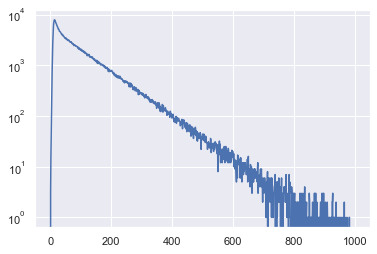

In [93]:
tau = (1, 10) # lifetime of 1 and 4 ns
amp = (0.5, 0.5) # equal weight
I0 = 1E5 # number of photons
t = np.linspace(0,100,1000) # time axis
model = np.zeros(t.shape)
for i in range(len(tau)):
    model += amp[i]*np.exp(-t/tau[i])
model *= I0
# convolute with Gaussian instrument response function
IRF = norm_pdf(t,1,0.25)
IRF /= np.sum(IRF)
model = np.convolve(IRF,model,'full')[:len(t)]
# add noise
model = np.random.poisson(model)
plt.semilogy(model)

Define the kernel function:

In [100]:
def kernel_function(x,tau,IRF):
    a = np.convolve(IRF,np.exp(-x/tau),'full')[:len(x)]
    return a

Do the MEM analyis:

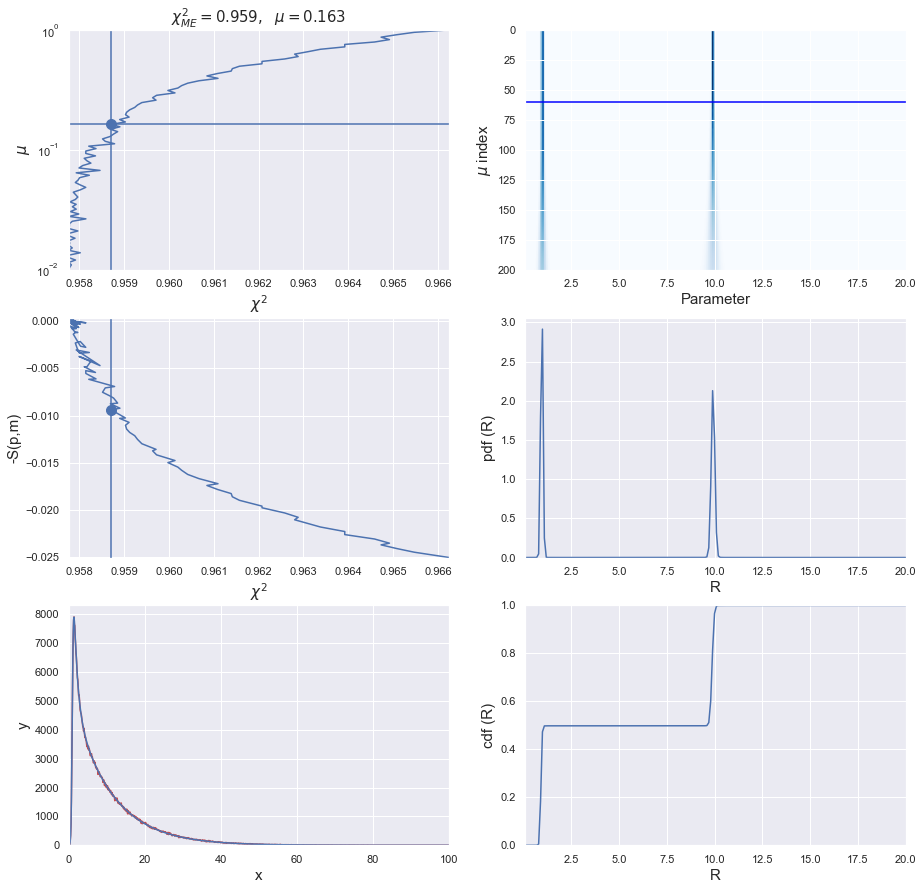

In [101]:
param_range = np.linspace(0.1,20,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF), param_range)
p, muRange, chiRange, SRange = solve_MEM(c,q,H,mParam)
result = A2pdf(p,mParam,param_range)
plot_MEM(60,t,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)
param_range_linspace = param_range.copy()
result_linspace = result[60,:]

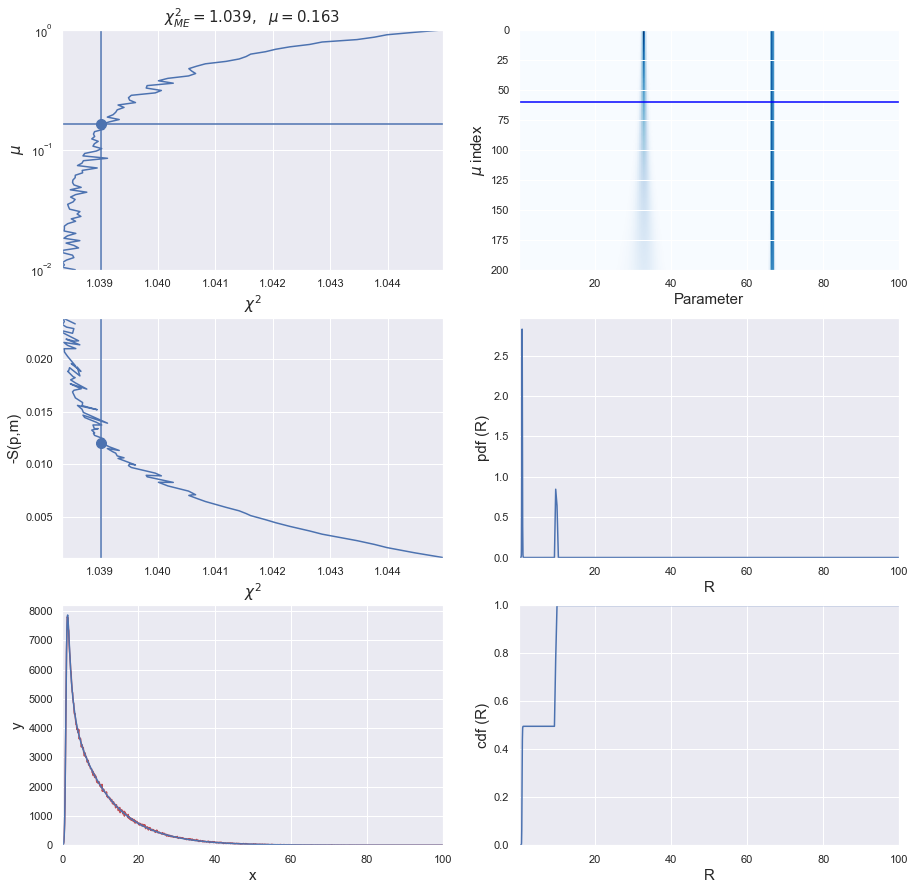

In [88]:
param_range = np.logspace(-1,2,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF), param_range)
p, muRange, chiRange, SRange = solve_MEM(c,q,H,mParam)
result = A2pdf(p,mParam,param_range)
plot_MEM(60,t,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)
param_range_logspace = param_range.copy()
result_logspace = result[60,:]

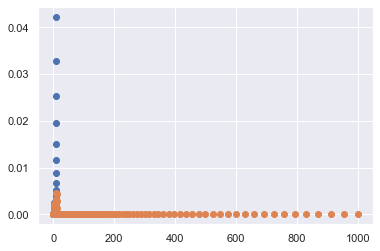

In [80]:
plt.scatter(param_range_linspace,result_linspace)
plt.scatter(param_range_logspace,result_logspace)

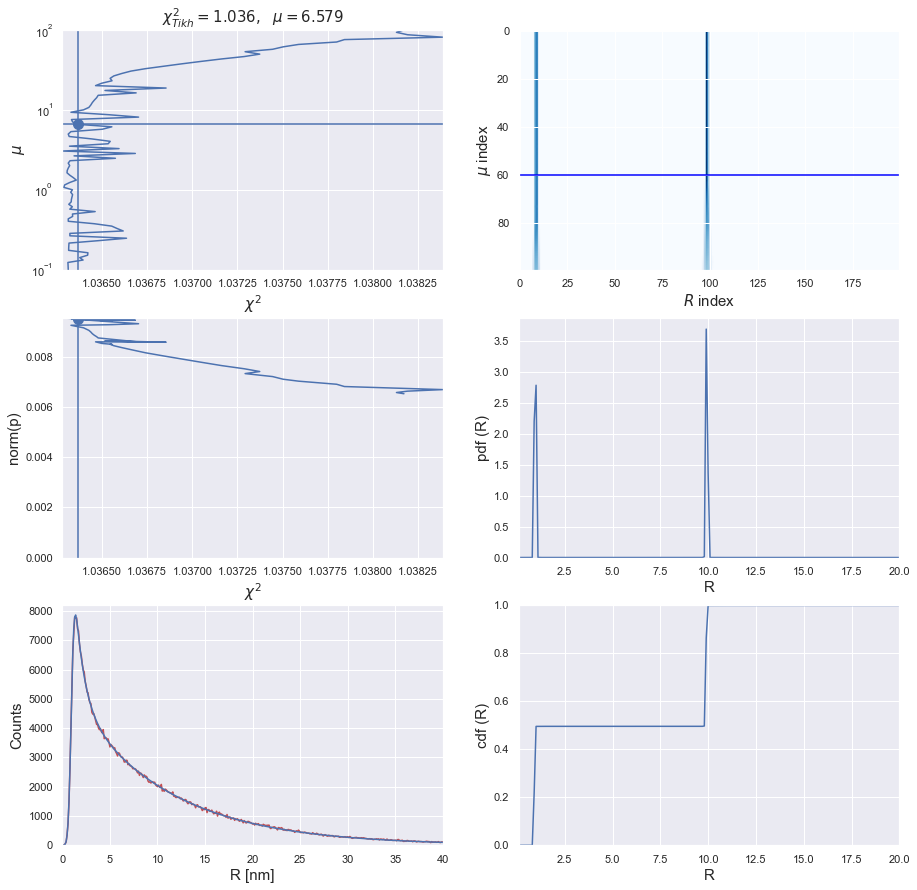

In [90]:
param_range = np.linspace(0.1,20,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF), param_range)
p, muRange, chiRange, SRange = solve_Tik(c,q,H,mParam)
result = A2pdf(p,mParam,param_range)
plot_Tik(60,t,model,param_range,mParam,p,F_R,chiRange,muRange,SRange)

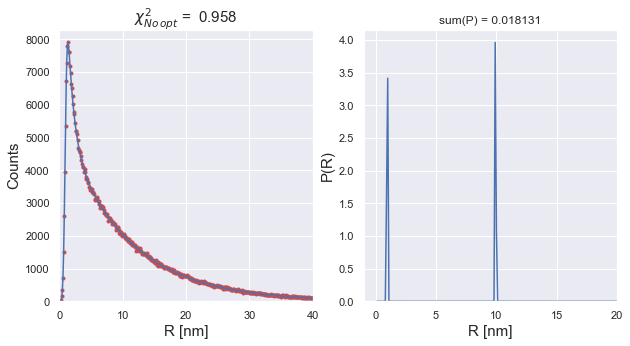

In [95]:
param_range = np.linspace(0.1,20,200)
# precalculations
F_R, param_range, mParam, c, q, H = kernel_calculation(t, model, lambda x : kernel_function(t,x,IRF), param_range)
p, chi2 = solve_noreg(c,q,H)
result = A2pdf(p,mParam,param_range)
plot_noreg(t,model,F_R,param_range,mParam,p,chi2)